# 데이터수집 및 전처리 (Data Preprocessing)

In [11]:
# uv add pandas
# uv add jupyter
# uv add numpy
# uv add scikit-learn
# uv add seaborn
# uv add matplotlib

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# 1. 결측치 처리

In [13]:
data = {
    'age' : [25, 27, np.nan, 29, 31, np.nan, 35],
    'income': [50000, 54000, 58000, np.nan, 61000, 62000, np.nan]
}

df = pd.DataFrame(data)
df

,age,income
0,25.00000,50000.00000
1,27.00000,54000.00000
2,NaN,58000.00000
3,29.00000,NaN
4,31.00000,61000.00000
5,NaN,62000.00000
6,35.00000,NaN


In [14]:
df.isnull().sum()
# 결측치가 총 4개다 (age:2개, income:2개)

age       2
income    2
dtype: int64

In [15]:
df.dropna()

,age,income
0,25.00000,50000.00000
1,27.00000,54000.00000
4,31.00000,61000.00000


In [16]:
df

,age,income
0,25.00000,50000.00000
1,27.00000,54000.00000
2,NaN,58000.00000
3,29.00000,NaN
4,31.00000,61000.00000
5,NaN,62000.00000
6,35.00000,NaN


## SimpleImputer

In [17]:
pd.set_option('display.float_format', '{:.5f}'.format)
np.set_printoptions(suppress=True)

# SimpleImputer : 결측치 값을 간단하게 어떤 값(평균값, 중앙값, ...)으로 대체할 수 있음
# mean : 평균값, median : 중앙값, most_frequent : 최빈값, constant : 고정값
imputer = SimpleImputer(strategy='mean')

result = imputer.fit_transform(df[['age', 'income']])

df[['age', 'income']] = result
df[['age', 'income']]

,age,income
0,25.00000,50000.00000
1,27.00000,54000.00000
2,29.40000,58000.00000
3,29.00000,57000.00000
4,31.00000,61000.00000
5,29.40000,62000.00000
6,35.00000,57000.00000


In [18]:
df[['age', 'income']]

,age,income
0,25.00000,50000.00000
1,27.00000,54000.00000
2,29.40000,58000.00000
3,29.00000,57000.00000
4,31.00000,61000.00000
5,29.40000,62000.00000
6,35.00000,57000.00000


# 2. 이상치 처리

## IQR (Interquartile Range)

- IQR = Q3 - Q1
- Q1 (1사분위수): 데이터 하위 25% 지점
- Q3 (3사분위수): 데이터 상위 75% 지점
- IQR은 중간 50% 데이터가 차지하는 범위
- IQR은 중앙값 기준으로 퍼진 정도를 나타내며, 이상치 판단 기준으로 활용

매우 많은 피처가 있을 경우 이들 중 결정값(즉 레이블)과 가장 상관성이 높은 피처들을 위주로 이상치 검출하는 것이 좋다

In [7]:
from sklearn.datasets import fetch_california_housing

In [19]:
# 이상치 처리 (california_housing 데이터셋을 이용하여 실습)
# IQR / Z-score 등
# 대부분 IQR 방법을 씀

housing = fetch_california_housing()
housing

# housing 은 dict로 되어있다
# "target" : 정답데이터  -> 데이터에서 제공해주는 행의 개수와 동일
# 'feature_names' : column name

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [20]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.32520,41.00000,6.98413,1.02381,322.00000,2.55556,37.88000,-122.23000
1,8.30140,21.00000,6.23814,0.97188,2401.00000,2.10984,37.86000,-122.22000
2,7.25740,52.00000,8.28814,1.07345,496.00000,2.80226,37.85000,-122.24000
3,5.64310,52.00000,5.81735,1.07306,558.00000,2.54795,37.85000,-122.25000
4,3.84620,52.00000,6.28185,1.08108,565.00000,2.18147,37.85000,-122.25000


In [21]:
# 지도학습하려면 학습데이터 말고 정답데이터 필요. 정답데이터 없으므로 추가
df['target'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.32520,41.00000,6.98413,1.02381,322.00000,2.55556,37.88000,-122.23000,4.52600
1,8.30140,21.00000,6.23814,0.97188,2401.00000,2.10984,37.86000,-122.22000,3.58500
2,7.25740,52.00000,8.28814,1.07345,496.00000,2.80226,37.85000,-122.24000,3.52100
3,5.64310,52.00000,5.81735,1.07306,558.00000,2.54795,37.85000,-122.25000,3.41300
4,3.84620,52.00000,6.28185,1.08108,565.00000,2.18147,37.85000,-122.25000,3.42200


In [22]:
# 1. info() : dataType 확인
# 왜 df.info()를 먼저 해야할까? -> 데이터 타입 먼저 파악해야함
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [23]:
# 2. describe() : 지수통계 확인
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.00000,20640.00000,20640.00000,20640.00000,20640.00000,20640.00000,20640.00000,20640.00000,20640.00000
mean,3.87067,28.63949,5.42900,1.09668,1425.47674,3.07066,35.63186,-119.56970,2.06856
std,1.89982,12.58556,2.47417,0.47391,1132.46212,10.38605,2.13595,2.00353,1.15396
min,0.49990,1.00000,0.84615,0.33333,3.00000,0.69231,32.54000,-124.35000,0.14999
25%,2.56340,18.00000,4.44072,1.00608,787.00000,2.42974,33.93000,-121.80000,1.19600
50%,3.53480,29.00000,5.22913,1.04878,1166.00000,2.81812,34.26000,-118.49000,1.79700
75%,4.74325,37.00000,6.05238,1.09953,1725.00000,3.28226,37.71000,-118.01000,2.64725
max,15.00010,52.00000,141.90909,34.06667,35682.00000,1243.33333,41.95000,-114.31000,5.00001


In [24]:
# 3. 결측치 확인 : 결측치 없음을 확인
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

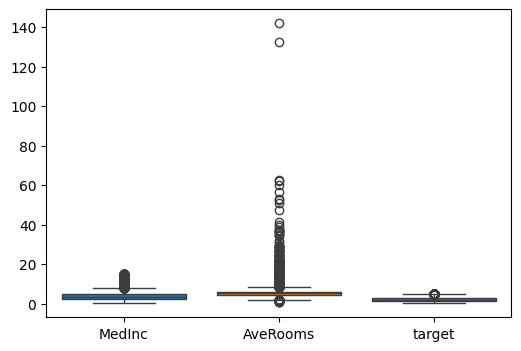

In [25]:
# 4. 시각화
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[["MedInc", "AveRooms", "target"]])
plt.show()

In [26]:
# 이상치데이터를 확인하고, 이상치데이터 제거 후 반환하는 함수
def remove_iqr(df, columns) :       # columns : list 형태
    df_clean = df.copy()            # df 복사본 만들기

    for col in columns :
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR      # 이상치데이터 하단
        upper = Q3 + 1.5 * IQR      # 이상치데이터 상단
        # 이상치데이터 범위 안에 것들만 추출 (lower 보다 높고 upper보다 작은)
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    
    return df_clean

In [27]:
print("Before : ", df.shape)

Before :  (20640, 9)


In [28]:
df_cleaned = remove_iqr(df, ["MedInc", "AveRooms", "target"])
print("After : ", df_cleaned.shape)

After :  (18818, 9)


# 3. 범주형 변수 처리

In [8]:
from sklearn.preprocessing import LabelEncoder

## 1) 라벨인코딩 (범주형 변수 -> 숫자)

In [29]:
# 1. 데이터 생성
data = {
    'gender': ['male', 'female', 'female', 'male', 'female'],
    'grade': ['A', 'B', 'A', 'C', 'B']
}

df = pd.DataFrame(data)
df

,gender,grade
0,male,A
1,female,B
2,female,A
3,male,C
4,female,B


In [30]:
# 2. LabelEncoder 객체 생성
le_gender = LabelEncoder()
le_grade = LabelEncoder()

# 3. 각 열에 대해 라벨 인코딩 적용
df["gender_encoded"] = le_gender.fit_transform(df["gender"])
df["grade_encoded"] = le_grade.fit_transform(df["grade"])

df

,gender,grade,gender_encoded,grade_encoded
0,male,A,1,0
1,female,B,0,1
2,female,A,0,0
3,male,C,1,2
4,female,B,0,1


## 2) 원핫인코딩

In [31]:
df = pd.DataFrame(data)
df

,gender,grade
0,male,A
1,female,B
2,female,A
3,male,C
4,female,B


In [32]:
df = pd.get_dummies(df, columns=["gender"])
df

,grade,gender_female,gender_male
0,A,False,True
1,B,True,False
2,A,True,False
3,C,False,True
4,B,True,False


In [33]:
df = pd.get_dummies(df, columns=["grade"])
df

,gender_female,gender_male,grade_A,grade_B,grade_C
0,False,True,True,False,False
1,True,False,False,True,False
2,True,False,True,False,False
3,False,True,False,False,True
4,True,False,False,True,False


# 4. 스케일링

- 특성 간 크기 차이 보정
- 큰 값이 더 큰 영향을 미칠 수 있기 때문에 스케일링 작업함
- 전처리 마지막과정에서 스케일러를 사용함
- StandardScaler : 머신러닝 / MinMaxScaler : 딥러닝

In [37]:
# !주의! 학습데이터(train) 스케일러와 테스트데이터(test) 스케일러가 동일해야함
# 스케일링 작업을 할때는 train data 기준으로!!!

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [36]:
data = {
    'height': [150, 160, 165, 180, 155],
    'weight': [60, 65, 55, 90, 62]
}

df = pd.DataFrame(data)
df

,height,weight
0,150,60
1,160,65
2,165,55
3,180,90
4,155,62


## 1) StandardScaler (표준화)

In [38]:
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=['height_std', 'weight_std'])
df_std

,height_std,weight_std
0,-1.16554,-0.52284
1,-0.19426,-0.11437
2,0.29139,-0.93130
3,1.74831,1.92796
4,-0.67990,-0.35945


## 2) MinMaxScaler (정규화)

In [41]:
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=['height_mm', 'weight_mm'])
df_minmax

,height_mm,weight_mm
0,0.00000,0.14286
1,0.33333,0.28571
2,0.50000,0.00000
3,1.00000,1.00000
4,0.16667,0.20000


# 5. 데이터 분할 (Train / Test)

- X : Features (입력값)
- y : Target (정답값)

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
# 붓꽃데이터 실습 -> 지도학습 중 '분류'
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2, stratify=y)

# stratify : 비율을 맞춰야하는 컬럼명 (정답(y)을 기준으로 비율을 8:2로(0.2))
# 분류 : 정답데이터의 비율이 일정하게 맞아야한다
# 정답데이터 : 0, 1, 2 -> 이 비율이 맞아야한다
# 모델의 성능을 비교할때는 똑같은 데이터셋을 이용해야 하므로 random_state 를 사용
# random_state : 항상 동일한 랜덤값이 나옴

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target

df.head()

# 여기서 target을 넣어주는 것은 원본 dataFrame을 만들기 위함
# 머신러닝을 학습시킬때는 문제를 주고 답(target)을 받아야 하기 때문에
# 답(target)을 주면 안되니까 target을 빼고 문제 -> X, 답 -> y

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = df.drop("target", axis=1)   # axis=0이면 행, axis=1이면 열
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 6. 피처 엔지니어링

- 특정 아이디어 하나로 영향을 미칠 수 있음 (기존 데이터를 기반으로 새로운 특성 생성)
- 정답이 없다 (경험치, 도메인 지식..)

# 교차검증

## K-Fold 교차검증

- 전체 데이터를 K개의 Fold로 나눔
- K번 반복 : 한 폴드를 검증용으로, 나머지 K-1개를 학습용으로 사용
- K개의 평가 점수를 평균하여 최종 성능으로 사용

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X, y = load_iris(return_X_y=True)   # 자동으로 X,y 뽑아옴 (원래는 train_test_split 로 데이터를 나눠줘야함)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [29]:
model = RandomForestClassifier()    # 아무것도 학습하지 않은 clean한 상태의 모델

score = cross_val_score(model, X, y, cv=5)  # cv=5 : 5개의 Fold 로 나눔

score

# 원래는 fold 나눠서 다 해줘야 하는데 cross_val_score 가 알아서 다 해줌

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [24]:
score.mean()

np.float64(0.96)

## Stratified K-Fold

- 비율이 맞지 않음 (train_test_split 할때는 stratify를 통해 비율을 맞춰줬었는데, fold는 그냥 방 나누기만 함)
- 그래서 K-Fold 의 비율을 맞추는 Stratified K-Fold 씀
- 분류학습할때만 써주면 됨 (비율이 맞아야하므로)

In [25]:
from sklearn.model_selection import StratifiedKFold

In [26]:
cv = StratifiedKFold(n_splits=5)

model = RandomForestClassifier()    # 아무것도 학습하지 않은 clean한 상태의 모델

score = cross_val_score(model, X, y, cv=5)  # 5개의 Fold 로 나눔

score

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [27]:
score.mean()

np.float64(0.9666666666666668)